In [1]:
!pip install kaggle
!kaggle
with open("/root/.kaggle/kaggle.json","w") as fp:
  info = '{"username":"shashankmanurao","key":"52eb38fb5caedc18eda01c110d1022db"}'
  fp.write(info)
!kaggle competitions download -c home-credit-default-risk

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
100% 56.8M/56.8M [00:00<00:00, 60.1MB/s]

  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 167MB/s]
 94% 34.0M/36.1M [00:00<00:00, 60.9MB/s]
100% 36.1M/36.1M [00:00<00:00, 104MB/s] 
  0% 0.00/5.81M [00:00<?, ?B/s]
100% 5.81M/5.81M [00:00<00:00, 53.4MB/s]
 93% 253M/271M [00:01<00:00, 125MB/s]
100% 271M/271M [00:02<00:00, 137MB/s]
 95% 35.0M/36.8M [00:00<00:00, 44.7MB/s]
100% 36.8M/36.8M [00:00<00:00, 82.9MB/s]
 79% 76.0M/96.7M [00:00<00:00, 84.7MB/s]
100% 96.7M/96.7M [00:00<00:00, 132MB/s] 
 90% 

In [0]:
! ls

application_test.csv.zip	    installments_payments.csv.zip
application_train.csv.zip	    POS_CASH_balance.csv.zip
bureau_balance.csv.zip		    previous_application.csv.zip
bureau.csv.zip			    sample_data
credit_card_balance.csv.zip	    sample_submission.csv
HomeCredit_columns_description.csv


In [2]:
!unzip application_train.csv.zip
!unzip bureau_balance.csv.zip
!unzip bureau.csv.zip
!unzip credit_card_balance.csv.zip
!unzip installments_payments.csv.zip
!unzip POS_CASH_balance.csv.zip
!unzip previous_application.csv.zip

Archive:  application_train.csv.zip
  inflating: application_train.csv   
Archive:  bureau_balance.csv.zip
  inflating: bureau_balance.csv      
Archive:  bureau.csv.zip
  inflating: bureau.csv              
Archive:  credit_card_balance.csv.zip
  inflating: credit_card_balance.csv  
Archive:  installments_payments.csv.zip
  inflating: installments_payments.csv  
Archive:  POS_CASH_balance.csv.zip
  inflating: POS_CASH_balance.csv    
Archive:  previous_application.csv.zip
  inflating: previous_application.csv  


In [3]:
import numpy as np
import pandas as pd 
import gc
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:


# Read in the full datasets
app = pd.read_csv('application_train.csv')
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
cash = pd.read_csv('POS_CASH_balance.csv')
credit = pd.read_csv('credit_card_balance.csv')
previous = pd.read_csv('previous_application.csv')
installments = pd.read_csv('installments_payments.csv')

print('Read data')

Read data


In [0]:
app['SK_ID_CURR']=app['SK_ID_CURR'].astype('str')
bureau[['SK_ID_CURR','SK_ID_BUREAU']]=bureau[['SK_ID_CURR','SK_ID_BUREAU']].astype('str')
bureau_balance['SK_ID_BUREAU']=bureau_balance['SK_ID_BUREAU'].astype('str')
cash[['SK_ID_PREV','SK_ID_CURR']]=cash[['SK_ID_PREV','SK_ID_CURR']].astype('str')
previous[['SK_ID_PREV','SK_ID_CURR']]=previous[['SK_ID_PREV','SK_ID_CURR']].astype('str')
credit[['SK_ID_PREV','SK_ID_CURR']]=credit[['SK_ID_PREV','SK_ID_CURR']].astype('str')
installments[['SK_ID_PREV','SK_ID_CURR']]=installments[['SK_ID_PREV','SK_ID_CURR']].astype('str')

In [0]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [0]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [0]:
cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [0]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
credit.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [0]:
installments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


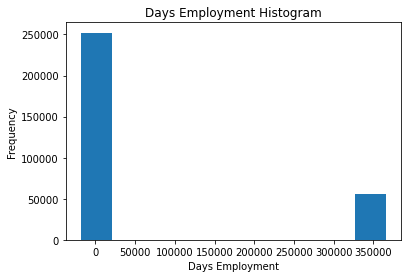

In [0]:
app['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

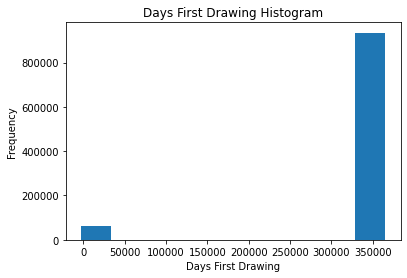

In [0]:
previous['DAYS_FIRST_DRAWING'].plot.hist(title = 'Days First Drawing Histogram');
plt.xlabel('Days First Drawing');

In [0]:
#Removing outliers
app=app.replace({365243: np.nan})
previous=previous.replace({365243: np.nan})

In [0]:
def missing(df, threshold = 50):
    # Calculate missing stats 
    miss = pd.DataFrame(df.isnull().sum())
    miss['percent'] = 100 * miss[0] / len(df)
        
    # list of missing columns
    missing_columns = (miss[miss['percent']>threshold])
    return missing_columns

In [8]:
missing(previous,threshold=90)

,0,percent
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_INTEREST_PRIVILEGED,1664263,99.643698
DAYS_FIRST_DRAWING,1607509,96.245691


In [0]:
previous=previous.drop(columns=["RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED","DAYS_FIRST_DRAWING"])

In [0]:
def agg2(df, parent_var, df_name):  
    
    # Remove id variables other than grouping variable
    for col in df.columns:
        if col != parent_var and 'SK_ID' in col:
            df = df.drop(columns = col)
    
    # Only want the numeric variables
    numeric_df = df.select_dtypes(include=['float','int','double']).copy()
    numeric_df[parent_var] = df[parent_var]
    # Group by the specified variable and calculate the statistics
    agg_df = numeric_df.groupby(parent_var).agg(['count', 'mean', 'max', 'min', 'sum'])
    
    columns = []

    # Iterate through the variables names
    for var in agg_df.columns.levels[0]:
        if var != parent_var:
            # Iterate through the stat names
            for stat in agg_df.columns.levels[1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))
    
    agg_df.columns = columns
    # Select the categorical columns
    catdata = df.select_dtypes(['category','object','bool'])
    if parent_var in catdata.columns:
        catdata=catdata.drop(columns = parent_var)
    
    if catdata.shape[1] != 0:
        
        categorical = pd.get_dummies(catdata)
        
        # Make sure to put the identifying id on the column
        categorical[parent_var] = df[parent_var]
        
        # Groupby the group var and calculate the sum and mean
        categorical = categorical.groupby(parent_var).agg(['sum', 'count', 'mean'])
        
        column_names = []
    
        # Iterate through the columns in level 0
        for var1 in categorical.columns.levels[0]:
            if var1 != parent_var:
                # Iterate through the stats in level 1
                for stat1 in ['sum', 'count', 'mean']:
                    # Make a new column name
                    column_names.append('%s_%s_%s' % (df_name, var1, stat1))
        categorical.columns=column_names
        # Merge on the parent variable
        agg_df1 = agg_df.merge(categorical, on=parent_var, how = 'outer')
    else:
        agg_df1=agg_df   
    
    # Remove the columns with all redundant values
    _, idx = np.unique(agg_df1, axis = 1, return_index=True)
    agg_df1 = agg_df1.iloc[:, idx]
    
    return agg_df1

In [0]:
def agg_subset(df, parent_var, df_name, parent_df=None, grandparent_var=None):
    """Aggregate a grandchild dataframe at the grandparent level."""
    if parent_df is None and grandparent_var is None :
        return agg2(df, parent_var, df_name)
    else:
    # set the parent_var as the index of the parent_df for faster merges
        parent_df = parent_df[[parent_var, grandparent_var]].copy().set_index(parent_var)
        
    # Aggregate the numeric variables at the parent level
        df_agg = agg2(df, parent_var, '%s_LOAN' % df_name)
    
    # Merge to get the grandparent variable in the data
        df_agg = df_agg.merge(parent_df, 
                          on = parent_var, how = 'left')
    
    # Aggregate the numeric variables at the grandparent level
        df_info = agg2(df_agg, grandparent_var, '%s_CLIENT' % df_name)
    
  
        gc.enable()
        del df_agg
        gc.collect()
    
    # Drop the columns with all duplicated values
        _, idx = np.unique(df_info, axis = 1, return_index=True)
        df_info = df_info.iloc[:, idx]
    
        return df_info

In [0]:
#Customized features
app['LOAN_RATE'] = app['AMT_ANNUITY'] / app['AMT_CREDIT'] 
app['CREDIT_INCOME_RATIO'] = app['AMT_CREDIT'] / app['AMT_INCOME_TOTAL']
app['EMPLOYED_BIRTH_RATIO'] = app['DAYS_EMPLOYED'] / app['DAYS_BIRTH']
app['EXT_SOURCE_SUM'] = app[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].sum(axis = 1)
app['EXT_SOURCE_MEAN'] = app[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
app['AMT_REQ_SUM'] = app[[x for x in app.columns if 'AMT_REQ_' in x]].sum(axis = 1)

bureau['LOAN_RATE'] = bureau['AMT_ANNUITY'] / bureau['AMT_CREDIT_SUM']

bureau_balance['PAST_DUE'] = bureau_balance['STATUS'].isin(['1', '2', '3', '4', '5'])
bureau_balance['ON_TIME'] = bureau_balance['STATUS'] == '0'

previous['LOAN_RATE'] = previous['AMT_ANNUITY'] / previous['AMT_CREDIT']
previous["AMT_DIFFERENCE"] = previous['AMT_CREDIT'] - previous['AMT_APPLICATION']

installments['LATE'] = installments['DAYS_ENTRY_PAYMENT'] > installments['DAYS_INSTALMENT']
installments['LOW_PAYMENT'] = installments['AMT_PAYMENT'] < installments['AMT_INSTALMENT']

cash['LATE_PAYMENT'] = cash['SK_DPD'] > 0.0
cash['INSTALLMENTS_PAID'] = cash['CNT_INSTALMENT'] - cash['CNT_INSTALMENT_FUTURE']

credit['OVER_LIMIT'] = credit['AMT_BALANCE'] > credit['AMT_CREDIT_LIMIT_ACTUAL']
credit['BALANCE_CLEARED'] = credit['AMT_BALANCE'] == 0.0
credit['LOW_PAYMENT'] = credit['AMT_PAYMENT_CURRENT'] < credit['AMT_INST_MIN_REGULARITY']
credit['LATE'] = credit['SK_DPD'] > 0.0

## Exploratory Data Analysis

### Age Effect on being likely Defaulters

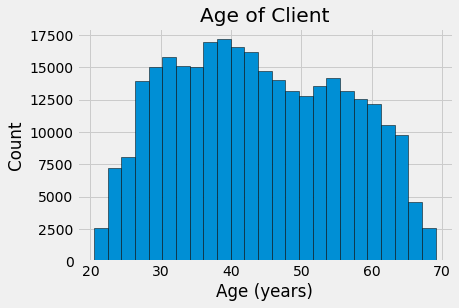

In [0]:
app['DAYS_BIRTH_NEW']=-1*app['DAYS_BIRTH']
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app['DAYS_BIRTH_NEW'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

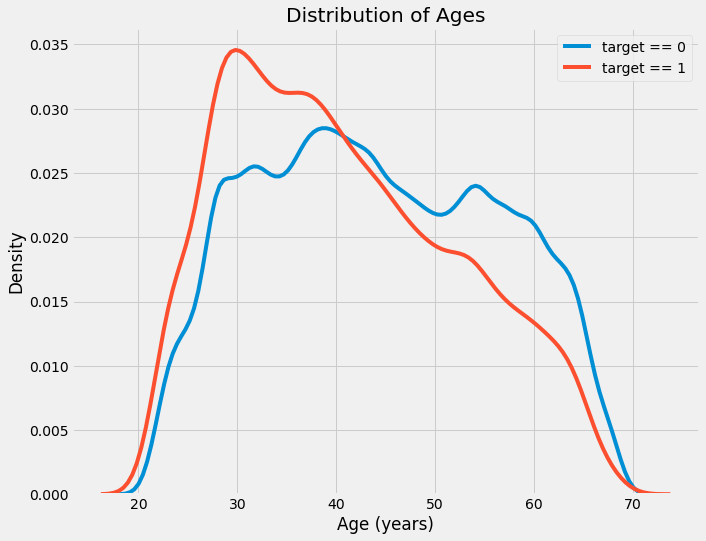

In [0]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app.loc[app['TARGET'] == 0, 'DAYS_BIRTH_NEW'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app.loc[app['TARGET'] == 1, 'DAYS_BIRTH_NEW'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [0]:
# Age information into a separate dataframe
age_data = app.loc[:,['TARGET']]
age_data['DAYS_BIRTH'] = app['DAYS_BIRTH_NEW']
age_data['YEARS_BIRTH'] = (age_data['DAYS_BIRTH']) / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1.0,9461.0,25.920548,"(25.0, 30.0]"
1,0.0,16765.0,45.931507,"(45.0, 50.0]"
2,0.0,19046.0,52.180822,"(50.0, 55.0]"
3,0.0,19005.0,52.068493,"(50.0, 55.0]"
4,0.0,19932.0,54.608219,"(50.0, 55.0]"
5,0.0,16941.0,46.413699,"(45.0, 50.0]"
6,0.0,13778.0,37.747945,"(35.0, 40.0]"
7,0.0,18850.0,51.643836,"(50.0, 55.0]"
8,0.0,20099.0,55.065753,"(55.0, 60.0]"
9,0.0,14469.0,39.641096,"(35.0, 40.0]"


In [0]:
app=app.drop('DAYS_BIRTH_NEW',axis=1)

In [0]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


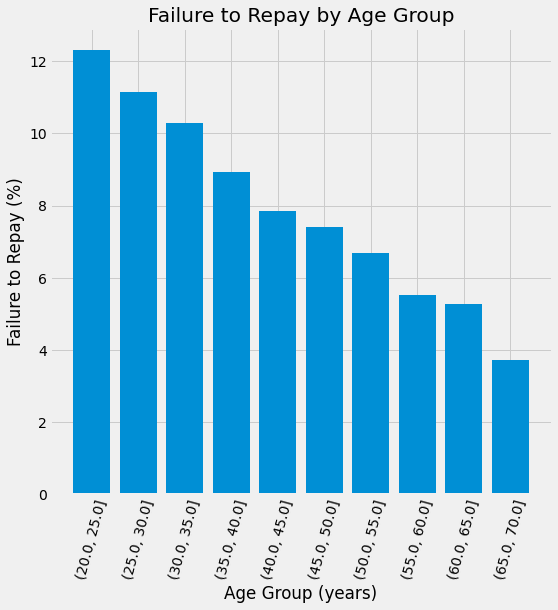

In [0]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

### Insight:
There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

## Housing Type Frequencies

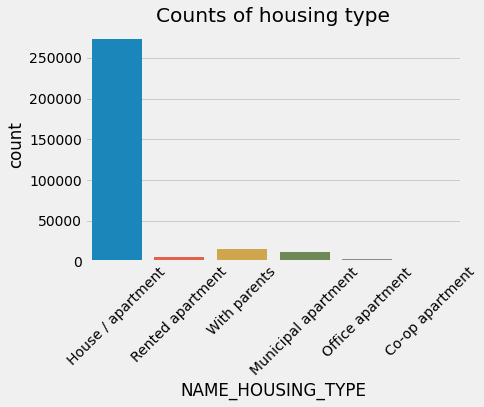

In [0]:
#Plotting frequencies of types of houses
sns.countplot(app['NAME_HOUSING_TYPE']);
plt.xticks(rotation=45);
plt.title('Counts of housing type')
plt.show()

### Contact information
There are 6 features showing that client provided some contact information, let's see how many ways of contact clients usually provide.

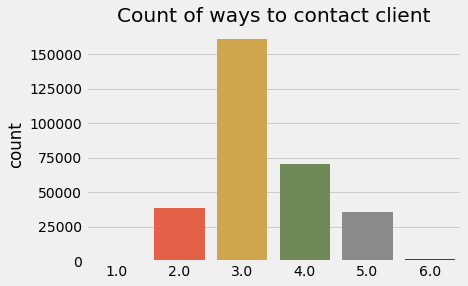

In [0]:
contact_info = app['FLAG_MOBIL'] + app['FLAG_EMP_PHONE'] + app['FLAG_WORK_PHONE'] + app['FLAG_CONT_MOBILE'] + app['FLAG_PHONE'] + app['FLAG_EMAIL']
sns.countplot(contact_info);
plt.title('Count of ways to contact client');

## AMOUNT CREDIT PLOTS

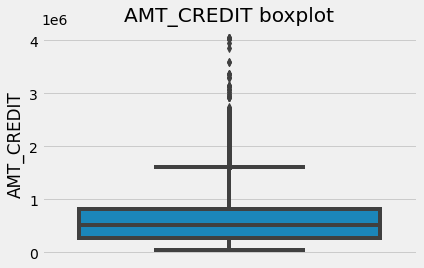

In [0]:
sns.boxplot(app['AMT_CREDIT'], orient='v');
plt.title('AMT_CREDIT boxplot');

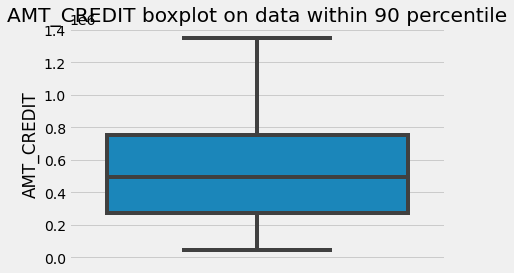

In [0]:
sns.boxplot(app[app['AMT_CREDIT'] < np.percentile(app['AMT_CREDIT'], 95)]['AMT_CREDIT'], orient='v');
plt.title('AMT_CREDIT boxplot on data within 90 percentile');

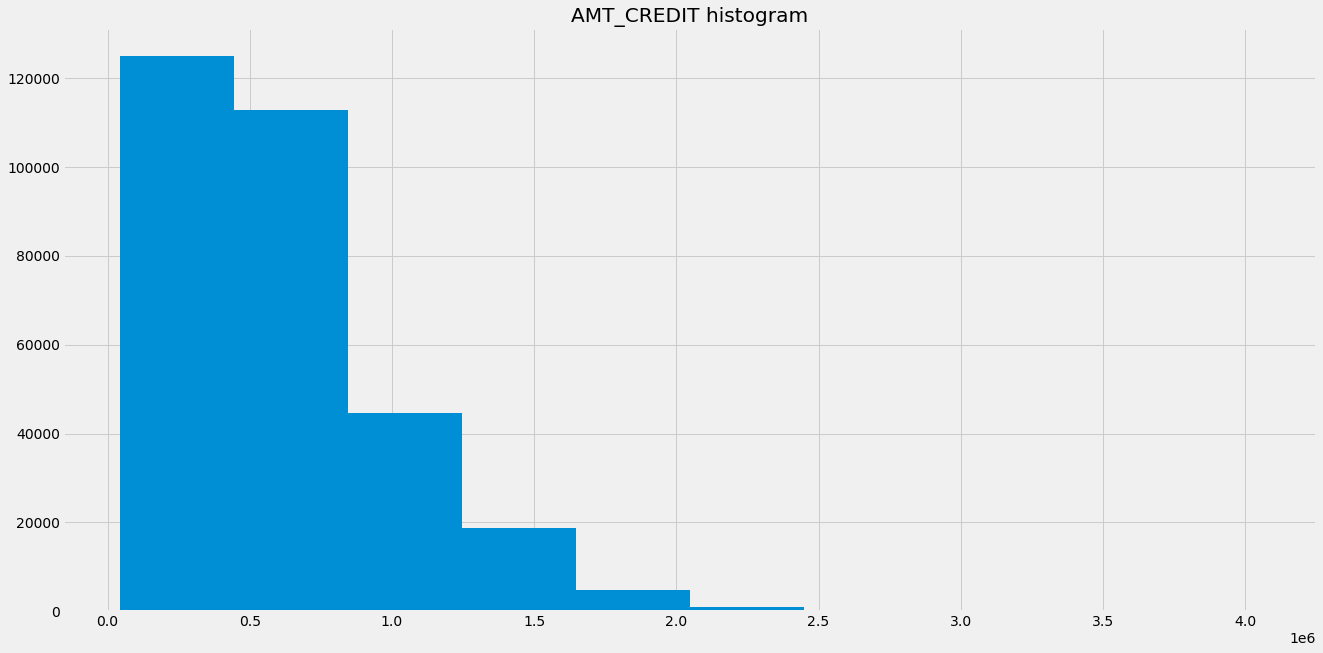

In [0]:
plt.figure(figsize=(20,10))
plt.hist(app['AMT_CREDIT']);
plt.title('AMT_CREDIT histogram');

## Duration of credit (DAYS_CREDIT)

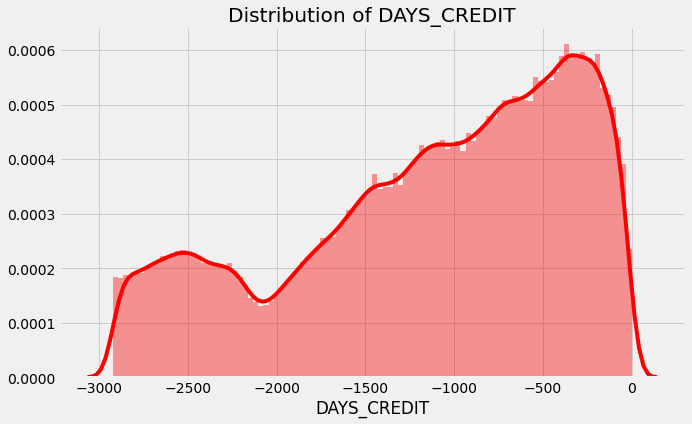

In [0]:
plt.figure(figsize=(10,6))
plt.title("Distribution of %s" % 'DAYS_CREDIT')
sns.distplot(bureau['DAYS_CREDIT'].dropna(),color='red', kde=True,bins=100)
plt.show() 

### Insight:
The credit duration (in days) is ranging between less than 3000 days and with a increasing frequency for shorter number of days - and with a peak around 300 days (or less than one year).

## CREDIT OVERDUE

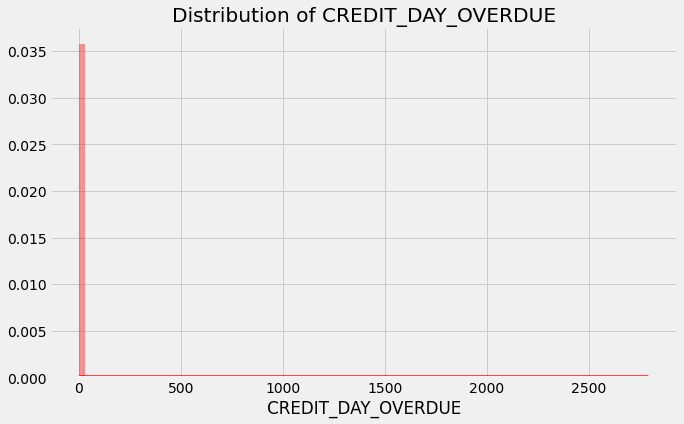

In [0]:
plt.figure(figsize=(10,6))
plt.title("Distribution of %s" % 'CREDIT_DAY_OVERDUE')
sns.distplot(bureau['CREDIT_DAY_OVERDUE'].dropna(),color='red', kde=True,bins=100)
plt.show() 


### Insight:
Most of the credits have 0 or close to 0 days overdue. The maximum number of credit days overdue is ~3000 days.

In [13]:
#Converting days columns of bureau dataframe to timedelta
for col in ['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE']:
    bureau[col] = pd.to_timedelta(bureau[col], 'D')
    
bureau[['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE']].head()

,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,DAYS_CREDIT_UPDATE
0,-497 days,-153 days,-153 days,-131 days
1,-208 days,1075 days,NaT,-20 days
2,-203 days,528 days,NaT,-16 days
3,-203 days,NaT,NaT,-16 days
4,-629 days,1197 days,NaT,-21 days


In [14]:
# Establish a starting date for all applications at Home Credit
start_date = pd.Timestamp("2020-04-20")
start_date

Timestamp('2020-04-20 00:00:00')

In [0]:
# Create the date columns for bureau
bureau['bureau_credit_application_date'] = start_date + bureau['DAYS_CREDIT']
bureau['bureau_credit_end_date'] = start_date + bureau['DAYS_CREDIT_ENDDATE']
bureau['bureau_credit_close_date'] = start_date + bureau['DAYS_ENDDATE_FACT']
bureau['bureau_credit_update_date'] = start_date + bureau['DAYS_CREDIT_UPDATE']
# Drop the time offset columns
bureau = bureau.drop(columns = ['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE'])

In [0]:
# Convert to timedelta
for col in ['DAYS_DECISION', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']:
    previous[col] = pd.to_timedelta(previous[col], 'D')
    
# Make date columns
previous['previous_decision_date'] = start_date + previous['DAYS_DECISION']
previous['previous_first_due_date'] = start_date + previous['DAYS_FIRST_DUE']
previous['previous_last_duefirst_date'] = start_date + previous['DAYS_LAST_DUE_1ST_VERSION']
previous['previous_last_due_date'] = start_date + previous['DAYS_LAST_DUE']
previous['previous_termination_date'] = start_date + previous['DAYS_TERMINATION']

# Drop the time offset columns
previous = previous.drop(columns = ['DAYS_DECISION', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'])

In [0]:
# Convert to timedelta objects
credit['MONTHS_BALANCE'] = pd.to_timedelta(credit['MONTHS_BALANCE'], 'D')
cash['MONTHS_BALANCE'] = pd.to_timedelta(cash['MONTHS_BALANCE'], 'D')

# Make a date column
credit['credit_balance_date'] = start_date + credit['MONTHS_BALANCE']
credit = credit.drop(columns = ['MONTHS_BALANCE'])

# Make a date column
cash['cash_balance_date'] = start_date + cash['MONTHS_BALANCE']
cash = cash.drop(columns = ['MONTHS_BALANCE'])



# Convert to time delta object
installments['DAYS_INSTALMENT'] = pd.to_timedelta(installments['DAYS_INSTALMENT'], 'D')
installments['DAYS_ENTRY_PAYMENT'] = pd.to_timedelta(installments['DAYS_ENTRY_PAYMENT'], 'D')

# Create time column and drop
installments['installments_due_date'] = start_date + installments['DAYS_INSTALMENT']
installments = installments.drop(columns = ['DAYS_INSTALMENT'])

installments['installments_paid_date'] = start_date + installments['DAYS_ENTRY_PAYMENT']
installments = installments.drop(columns = ['DAYS_ENTRY_PAYMENT'])

In [18]:
#One hot encode application dataframe columns
app = app.set_index('SK_ID_CURR')
cat=app.select_dtypes(['object','category'])
category=pd.get_dummies(cat)
app=app.drop(app.select_dtypes(['object','category']).columns,axis=1)
app=app.merge(category,on="SK_ID_CURR",how='left')
app.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
100003,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
100004,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100006,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100007,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,11.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
#Aggregating bureau dataframe
bureau_info = agg_subset(df=bureau, parent_var='SK_ID_CURR', df_name='BUREAU')
bureau_info.head()

,BUREAU_CREDIT_TYPE_Mobile operator loan_mean,BUREAU_CREDIT_TYPE_Mobile operator loan_sum,BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending)_mean,BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending)_sum,BUREAU_CREDIT_ACTIVE_Bad debt_mean,BUREAU_CREDIT_ACTIVE_Bad debt_sum,BUREAU_CREDIT_TYPE_Interbank credit_mean,BUREAU_CREDIT_TYPE_Interbank credit_sum,BUREAU_CREDIT_TYPE_Real estate loan_mean,BUREAU_CREDIT_TYPE_Real estate loan_sum,BUREAU_CREDIT_CURRENCY_currency 4_mean,BUREAU_CREDIT_CURRENCY_currency 4_sum,BUREAU_CREDIT_CURRENCY_currency 3_mean,BUREAU_CREDIT_CURRENCY_currency 3_sum,BUREAU_CREDIT_TYPE_Loan for the purchase of equipment_mean,BUREAU_CREDIT_TYPE_Loan for the purchase of equipment_sum,BUREAU_CREDIT_TYPE_Cash loan (non-earmarked)_mean,BUREAU_CREDIT_TYPE_Cash loan (non-earmarked)_sum,BUREAU_CREDIT_TYPE_Unknown type of loan_mean,BUREAU_CREDIT_TYPE_Unknown type of loan_sum,BUREAU_CREDIT_TYPE_Another type of loan_mean,BUREAU_CREDIT_TYPE_Another type of loan_sum,BUREAU_CNT_CREDIT_PROLONG_min,BUREAU_CREDIT_DAY_OVERDUE_min,BUREAU_AMT_CREDIT_SUM_OVERDUE_min,BUREAU_CREDIT_TYPE_Loan for working capital replenishment_mean,BUREAU_CREDIT_TYPE_Loan for working capital replenishment_sum,BUREAU_CREDIT_CURRENCY_currency 2_mean,BUREAU_CREDIT_CURRENCY_currency 2_sum,BUREAU_CREDIT_DAY_OVERDUE_mean,BUREAU_CREDIT_DAY_OVERDUE_max,BUREAU_CREDIT_DAY_OVERDUE_sum,BUREAU_AMT_CREDIT_SUM_OVERDUE_mean,BUREAU_AMT_CREDIT_SUM_OVERDUE_max,BUREAU_AMT_CREDIT_SUM_OVERDUE_sum,BUREAU_CNT_CREDIT_PROLONG_mean,BUREAU_CNT_CREDIT_PROLONG_max,BUREAU_CNT_CREDIT_PROLONG_sum,BUREAU_CREDIT_ACTIVE_Sold_mean,BUREAU_CREDIT_ACTIVE_Sold_sum,...,BUREAU_CREDIT_TYPE_Loan for business development_sum,BUREAU_LOAN_RATE_min,BUREAU_AMT_ANNUITY_min,BUREAU_CREDIT_TYPE_Credit card_mean,BUREAU_CREDIT_TYPE_Credit card_sum,BUREAU_AMT_CREDIT_MAX_OVERDUE_count,BUREAU_AMT_CREDIT_SUM_LIMIT_mean,BUREAU_AMT_CREDIT_MAX_OVERDUE_sum,BUREAU_AMT_CREDIT_SUM_LIMIT_sum,BUREAU_AMT_CREDIT_SUM_LIMIT_max,BUREAU_LOAN_RATE_mean,BUREAU_LOAN_RATE_max,BUREAU_LOAN_RATE_sum,BUREAU_CREDIT_ACTIVE_Active_mean,BUREAU_CREDIT_ACTIVE_Closed_mean,BUREAU_CREDIT_TYPE_Consumer credit_mean,BUREAU_CREDIT_CURRENCY_currency 1_mean,BUREAU_CREDIT_ACTIVE_Active_sum,BUREAU_CREDIT_ACTIVE_Closed_sum,BUREAU_AMT_CREDIT_SUM_LIMIT_count,BUREAU_CREDIT_TYPE_Consumer credit_sum,BUREAU_AMT_CREDIT_SUM_DEBT_count,BUREAU_LOAN_RATE_count,BUREAU_AMT_ANNUITY_count,BUREAU_CREDIT_CURRENCY_currency 1_sum,BUREAU_AMT_CREDIT_SUM_count,BUREAU_CREDIT_DAY_OVERDUE_count,BUREAU_AMT_ANNUITY_mean,BUREAU_AMT_ANNUITY_max,BUREAU_AMT_ANNUITY_sum,BUREAU_AMT_CREDIT_SUM_DEBT_mean,BUREAU_AMT_CREDIT_SUM_min,BUREAU_AMT_CREDIT_SUM_mean,BUREAU_AMT_CREDIT_SUM_DEBT_max,BUREAU_AMT_CREDIT_SUM_max,BUREAU_AMT_CREDIT_SUM_DEBT_sum,BUREAU_AMT_CREDIT_SUM_sum,BUREAU_AMT_CREDIT_MAX_OVERDUE_min,BUREAU_AMT_CREDIT_MAX_OVERDUE_mean,BUREAU_AMT_CREDIT_MAX_OVERDUE_max
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,...,0,0.0,0.0,0.000000,0,0,0.00000,0.000,0.000,0.000,0.013996,0.055627,0.097970,0.428571,0.571429,1.000000,1.0,3,4,6,7,7,7,7,7,7,7,3545.357143,10822.5,24817.5,85240.928571,85500.0,207623.571429,373239.0,378000.0,596686.5,1453365.000,NaN,NaN,NaN
100002,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,...,0,0.0,0.0,0.500000,4,5,7997.14125,8405.145,31988.565,31988.565,0.000000,0.000000,0.000000,0.250000,0.750000,0.500000,1.0,2,6,4,4,5,7,7,8,8,8,0.000000,0.0,0.0,49156.200000,0.0,108131.945625,245781.0,450000.0,245781.0,865055.565,0.0,1681.029,5043.645
100003,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,...,0,NaN,NaN,0.500000,2,4,202500.00000,0.000,810000.000,810000.000,NaN,NaN,0.000000,0.250000,0.750000,0.500000,1.0,1,3,4,2,4,0,0,4,4,4,NaN,NaN,0

In [20]:
#Aggregating balance bureau dataframe
bureau_balance_info = agg_subset(bureau_balance, 'SK_ID_BUREAU', "BB", parent_df=bureau, grandparent_var='SK_ID_CURR')
bureau_balance_info.head()

,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_sum_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_sum_min,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_sum_mean,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_min_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_mean_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_min_min,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_mean_min,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_min_mean,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_mean_mean,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_sum_max,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_min_max,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_mean_max,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_max_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_max_min,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_max_mean,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_max_max,BB_CLIENT_BB_LOAN_STATUS_5_mean_min,BB_CLIENT_BB_LOAN_STATUS_4_mean_min,BB_CLIENT_BB_LOAN_STATUS_3_mean_min,BB_CLIENT_BB_LOAN_STATUS_4_mean_mean,BB_CLIENT_BB_LOAN_STATUS_5_mean_mean,BB_CLIENT_BB_LOAN_STATUS_4_mean_max,BB_CLIENT_BB_LOAN_STATUS_4_mean_sum,BB_CLIENT_BB_LOAN_STATUS_5_mean_max,BB_CLIENT_BB_LOAN_STATUS_5_mean_sum,BB_CLIENT_BB_LOAN_STATUS_2_mean_min,BB_CLIENT_BB_LOAN_STATUS_3_mean_mean,BB_CLIENT_BB_LOAN_STATUS_3_mean_max,BB_CLIENT_BB_LOAN_STATUS_3_mean_sum,BB_CLIENT_BB_LOAN_STATUS_1_mean_min,BB_CLIENT_BB_LOAN_PAST_DUE_mean_min,BB_CLIENT_BB_LOAN_PAST_DUE_sum_min,BB_CLIENT_BB_LOAN_STATUS_2_mean_mean,BB_CLIENT_BB_LOAN_STATUS_2_mean_max,BB_CLIENT_BB_LOAN_STATUS_2_mean_sum,BB_CLIENT_BB_LOAN_STATUS_X_mean_min,BB_CLIENT_BB_LOAN_STATUS_C_mean_min,BB_CLIENT_BB_LOAN_STATUS_1_mean_mean,BB_CLIENT_BB_LOAN_PAST_DUE_mean_mean,BB_CLIENT_BB_LOAN_ON_TIME_mean_min,BB_CLIENT_BB_LOAN_STATUS_1_mean_max,BB_CLIENT_BB_LOAN_PAST_DUE_mean_max,BB_CLIENT_BB_LOAN_STATUS_1_mean_sum,BB_CLIENT_BB_LOAN_PAST_DUE_mean_sum,BB_CLIENT_BB_LOAN_PAST_DUE_sum_mean,BB_CLIENT_BB_LOAN_STATUS_X_mean_mean,BB_CLIENT_BB_LOAN_ON_TIME_mean_mean,BB_CLIENT_BB_LOAN_STATUS_C_mean_mean,BB_CLIENT_BB_LOAN_STATUS_X_mean_max,BB_CLIENT_BB_LOAN_STATUS_C_mean_max,BB_CLIENT_BB_LOAN_ON_TIME_mean_max,BB_CLIENT_BB_LOAN_ON_TIME_sum_min,BB_CLIENT_BB_LOAN_PAST_DUE_sum_max,BB_CLIENT_BB_LOAN_PAST_DUE_sum_sum,BB_CLIENT_BB_LOAN_STATUS_X_mean_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_min,BB_CLIENT_BB_LOAN_ON_TIME_mean_sum,BB_CLIENT_BB_LOAN_STATUS_C_mean_sum,BB_CLIENT_BB_LOAN_ON_TIME_sum_mean,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_sum_count,BB_CLIENT_BB_LOAN_ON_TIME_sum_max,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_mean,BB_CLIENT_BB_LOAN_ON_TIME_sum_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_max,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,-2800,-1326,-400.000000,-165,-82.5,-51,-25.5,-23.571429,-11.785714,-1,-1,-0.5,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.007519,0.007519,0.019231,0.052632,0.052632,0.052632,0.052632,0.142857,0.214590,0.336651,0.441240,0.500000,0.966667,1.000000,1.0,1.0,1.0,1.502129,2,2.356557,3.088683,4.428571,7,12.0,24.571429,31.0,52,172
100002,-2701,-632,-337.625000,-226,-175.0,-47,-39.5,-28.250000,-21.875000,-6,-3,-1.5,-124,-32,-15.5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.255682,0.255682,0.187500,0.500000,0.500000,2.045455,2.045455,3.375000,0.161932,0.406960,0.175426,0.500000,0.812500,0.818182,2.0,6.0,27.0,1.295455,4,3.255682,1.403409,5.625000,8,18.0,13.750000,45.0,22,110
100005,-91,-78,-30.333333,-18,-9.0,-12,-6.0,-6.000000,-3.000000,-3,-2,-1.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.538462,0.000000,0.000000,0.000000,0.000000,0.000000,0.136752,0.735043,0.128205,0.333333,0.384615,1.000000,2.0,0.0,0.0,0.410256,3,2.205128,0.384615,4.666667,3,7.0,7.000000,14.0,13,21
100010,-3312,-2610,-1656.000000,-127,-92.0,-90,-72.5,-63.500000,-46.000000,-702,-37,-19.5,-57,-55,-28.5,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722222,0.000000,0.000000,0.277778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.277778,0.722222,0.00000

In [0]:
del bureau_balance, bureau

In [22]:
#Merging bureau dataframe to application dataframe
app = app.merge(bureau_info, on = 'SK_ID_CURR', how = 'left')
app.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,BUREAU_CREDIT_TYPE_Loan for business development_sum,BUREAU_LOAN_RATE_min,BUREAU_AMT_ANNUITY_min,BUREAU_CREDIT_TYPE_Credit card_mean,BUREAU_CREDIT_TYPE_Credit card_sum,BUREAU_AMT_CREDIT_MAX_OVERDUE_count,BUREAU_AMT_CREDIT_SUM_LIMIT_mean,BUREAU_AMT_CREDIT_MAX_OVERDUE_sum,BUREAU_AMT_CREDIT_SUM_LIMIT_sum,BUREAU_AMT_CREDIT_SUM_LIMIT_max,BUREAU_LOAN_RATE_mean,BUREAU_LOAN_RATE_max,BUREAU_LOAN_RATE_sum,BUREAU_CREDIT_ACTIVE_Active_mean,BUREAU_CREDIT_ACTIVE_Closed_mean,BUREAU_CREDIT_TYPE_Consumer credit_mean,BUREAU_CREDIT_CURRENCY_currency 1_mean,BUREAU_CREDIT_ACTIVE_Active_sum,BUREAU_CREDIT_ACTIVE_Closed_sum,BUREAU_AMT_CREDIT_SUM_LIMIT_count,BUREAU_CREDIT_TYPE_Consumer credit_sum,BUREAU_AMT_CREDIT_SUM_DEBT_count,BUREAU_LOAN_RATE_count,BUREAU_AMT_ANNUITY_count,BUREAU_CREDIT_CURRENCY_currency 1_sum,BUREAU_AMT_CREDIT_SUM_count,BUREAU_CREDIT_DAY_OVERDUE_count,BUREAU_AMT_ANNUITY_mean,BUREAU_AMT_ANNUITY_max,BUREAU_AMT_ANNUITY_sum,BUREAU_AMT_CREDIT_SUM_DEBT_mean,BUREAU_AMT_CREDIT_SUM_min,BUREAU_AMT_CREDIT_SUM_mean,BUREAU_AMT_CREDIT_SUM_DEBT_max,BUREAU_AMT_CREDIT_SUM_max,BUREAU_AMT_CREDIT_SUM_DEBT_sum,BUREAU_AMT_CREDIT_SUM_sum,BUREAU_AMT_CREDIT_MAX_OVERDUE_min,BUREAU_AMT_CREDIT_MAX_OVERDUE_mean,BUREAU_AMT_CREDIT_MAX_OVERDUE_max
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,0.0,0.0,0.0,0.5,4.0,5.0,7997.14125,8405.145,31988.565,31988.565,0.0,0.0,0.0,0.25,0.75,0.5,1.0,2.0,6.0,4.0,4.0,5.0,7.0,7.0,8.0,8.0,8.0,0.0,0.0,0.0,49156.2,0.0,108131.945625,245781.0,450000.0,245781.0,865055.565,0.0,1681.029,5043.645
100003,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,0.0,NaN,NaN,0.5,2.0,4.0,202500.00000,0.000,810000.000,810000.000,NaN,NaN,0.0,0.25,0.75,0.5,1.0,1.0,3.0,4.0,2.0,4.0,0.0,0.0,4.0,4.0,4.0,NaN,NaN,0.0,0.0,22248.0,254350.125000,0.0,810000.0,0.0,1017400.500,0.0,0.000,0.000
100004,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,0.0,1.0,0.00000,0.000,0.000,0.000,NaN,NaN,0.0,0.00,1.00,1.0,1.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,NaN,NaN,0.0,0.0,94500.0,94518.900000,0.0,94537.8,0.0,189037.800,0.0,0.000,0.000
100006,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,11.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,0.0,1.0

In [0]:
del bureau_info

In [24]:
#Merging bureau balance dataframe to application dataframe
app = app.merge(bureau_balance_info, on = 'SK_ID_CURR', how = 'left')
app.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,BB_CLIENT_BB_LOAN_STATUS_2_mean_min,BB_CLIENT_BB_LOAN_STATUS_3_mean_mean,BB_CLIENT_BB_LOAN_STATUS_3_mean_max,BB_CLIENT_BB_LOAN_STATUS_3_mean_sum,BB_CLIENT_BB_LOAN_STATUS_1_mean_min,BB_CLIENT_BB_LOAN_PAST_DUE_mean_min,BB_CLIENT_BB_LOAN_PAST_DUE_sum_min,BB_CLIENT_BB_LOAN_STATUS_2_mean_mean,BB_CLIENT_BB_LOAN_STATUS_2_mean_max,BB_CLIENT_BB_LOAN_STATUS_2_mean_sum,BB_CLIENT_BB_LOAN_STATUS_X_mean_min,BB_CLIENT_BB_LOAN_STATUS_C_mean_min,BB_CLIENT_BB_LOAN_STATUS_1_mean_mean,BB_CLIENT_BB_LOAN_PAST_DUE_mean_mean,BB_CLIENT_BB_LOAN_ON_TIME_mean_min,BB_CLIENT_BB_LOAN_STATUS_1_mean_max,BB_CLIENT_BB_LOAN_PAST_DUE_mean_max,BB_CLIENT_BB_LOAN_STATUS_1_mean_sum,BB_CLIENT_BB_LOAN_PAST_DUE_mean_sum,BB_CLIENT_BB_LOAN_PAST_DUE_sum_mean,BB_CLIENT_BB_LOAN_STATUS_X_mean_mean,BB_CLIENT_BB_LOAN_ON_TIME_mean_mean,BB_CLIENT_BB_LOAN_STATUS_C_mean_mean,BB_CLIENT_BB_LOAN_STATUS_X_mean_max,BB_CLIENT_BB_LOAN_STATUS_C_mean_max,BB_CLIENT_BB_LOAN_ON_TIME_mean_max,BB_CLIENT_BB_LOAN_ON_TIME_sum_min,BB_CLIENT_BB_LOAN_PAST_DUE_sum_max,BB_CLIENT_BB_LOAN_PAST_DUE_sum_sum,BB_CLIENT_BB_LOAN_STATUS_X_mean_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_min,BB_CLIENT_BB_LOAN_ON_TIME_mean_sum,BB_CLIENT_BB_LOAN_STATUS_C_mean_sum,BB_CLIENT_BB_LOAN_ON_TIME_sum_mean,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_sum_count,BB_CLIENT_BB_LOAN_ON_TIME_sum_max,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_mean,BB_CLIENT_BB_LOAN_ON_TIME_sum_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_max,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.255682,0.255682,0.1875,0.5,0.5,2.045455,2.045455,3.375,0.161932,0.40696,0.175426,0.5,0.8125,0.818182,2.0,6.0,27.0,1.295455,4.0,3.255682,1.403409,5.625,8.0,18.0,13.75,45.0,22.0,110.0
100003,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,NaN,1.0,1.

In [0]:
del bureau_balance_info

In [26]:
#Aggregating previous dataframe
previous_info = agg_subset(df=previous, parent_var='SK_ID_CURR', df_name='PREVIOUS')
previous_info.head()

,PREVIOUS_AMT_DIFFERENCE_min,PREVIOUS_AMT_DIFFERENCE_mean,PREVIOUS_AMT_DIFFERENCE_max,PREVIOUS_AMT_DIFFERENCE_sum,PREVIOUS_NAME_GOODS_CATEGORY_Animals_mean,PREVIOUS_NAME_GOODS_CATEGORY_Animals_sum,PREVIOUS_NAME_GOODS_CATEGORY_House Construction_mean,PREVIOUS_NAME_GOODS_CATEGORY_House Construction_sum,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_mean,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_sum,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Money for a third person_mean,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Money for a third person_sum,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Hobby_mean,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Hobby_sum,PREVIOUS_NAME_GOODS_CATEGORY_Education_mean,PREVIOUS_NAME_GOODS_CATEGORY_Education_sum,PREVIOUS_NAME_GOODS_CATEGORY_Additional Service_mean,PREVIOUS_NAME_GOODS_CATEGORY_Additional Service_sum,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_mean,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_sum,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Buying a garage_mean,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Buying a garage_sum,PREVIOUS_NAME_GOODS_CATEGORY_Insurance_mean,PREVIOUS_NAME_GOODS_CATEGORY_Insurance_sum,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Business development_mean,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Business development_sum,PREVIOUS_NAME_GOODS_CATEGORY_Fitness_mean,PREVIOUS_NAME_GOODS_CATEGORY_Fitness_sum,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday_mean,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday_sum,PREVIOUS_NAME_SELLER_INDUSTRY_MLM partners_mean,PREVIOUS_NAME_SELLER_INDUSTRY_MLM partners_sum,PREVIOUS_NAME_GOODS_CATEGORY_Direct Sales_mean,PREVIOUS_NAME_GOODS_CATEGORY_Direct Sales_sum,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment_mean,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment_sum,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Journey_mean,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Journey_sum,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Furniture_mean,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Furniture_sum,...,PREVIOUS_LOAN_RATE_count,PREVIOUS_AMT_ANNUITY_count,PREVIOUS_CNT_PAYMENT_count,PREVIOUS_CODE_REJECT_REASON_XAP_sum,PREVIOUS_FLAG_LAST_APPL_PER_CONTRACT_Y_sum,PREVIOUS_NFLAG_LAST_APPL_IN_DAY_sum,PREVIOUS_AMT_CREDIT_count,PREVIOUS_AMT_APPLICATION_count,PREVIOUS_CNT_PAYMENT_min,PREVIOUS_CNT_PAYMENT_mean,PREVIOUS_CNT_PAYMENT_max,PREVIOUS_CNT_PAYMENT_sum,PREVIOUS_HOUR_APPR_PROCESS_START_min,PREVIOUS_HOUR_APPR_PROCESS_START_mean,PREVIOUS_HOUR_APPR_PROCESS_START_max,PREVIOUS_HOUR_APPR_PROCESS_START_sum,PREVIOUS_SELLERPLACE_AREA_min,PREVIOUS_SELLERPLACE_AREA_mean,PREVIOUS_SELLERPLACE_AREA_max,PREVIOUS_SELLERPLACE_AREA_sum,PREVIOUS_AMT_DOWN_PAYMENT_min,PREVIOUS_AMT_DOWN_PAYMENT_mean,PREVIOUS_AMT_DOWN_PAYMENT_max,PREVIOUS_AMT_DOWN_PAYMENT_sum,PREVIOUS_AMT_ANNUITY_min,PREVIOUS_AMT_ANNUITY_mean,PREVIOUS_AMT_ANNUITY_max,PREVIOUS_AMT_ANNUITY_sum,PREVIOUS_AMT_CREDIT_min,PREVIOUS_AMT_CREDIT_mean,PREVIOUS_AMT_CREDIT_max,PREVIOUS_AMT_CREDIT_sum,PREVIOUS_AMT_APPLICATION_min,PREVIOUS_AMT_GOODS_PRICE_min,PREVIOUS_AMT_APPLICATION_mean,PREVIOUS_AMT_GOODS_PRICE_mean,PREVIOUS_AMT_APPLICATION_max,PREVIOUS_AMT_GOODS_PRICE_max,PREVIOUS_AMT_GOODS_PRICE_sum,PREVIOUS_AMT_APPLICATION_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,-1048.5,-1048.5,-1048.5,-1048.5,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1,1,1,1,1,1,1,1,8.0,8.0,8.0,8.0,13,13.000000,13,13,23,23.0,23,23,2520.0,2520.0,2520.0,2520.0,3951.000,3951.000,3951.000,3951.000,23787.0,23787.00,23787.0,23787.0,24835.5,24835.5,24835.50,24835.5,24835.5,24835.5,24835.5,24835.5
100002,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1,1,1,1,1,1,1,1,24.0,24.0,24.0,24.0,9,9.000000,9,9,500,500.0,500,500,0.0,0.0,0.0,0.0,9251.775,9251.775,9251.775,9251.775,179055.0,179055.00,179055.0,179055.0,179055.0,179055.0,179055.00,179055.0,179055.0,179055.0,179055.0,179055.0
100003,-7

In [27]:
#Merging previous dataframe to application dataframe
app = app.merge(previous_info, on = 'SK_ID_CURR', how = 'left')
app.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,PREVIOUS_LOAN_RATE_count,PREVIOUS_AMT_ANNUITY_count,PREVIOUS_CNT_PAYMENT_count,PREVIOUS_CODE_REJECT_REASON_XAP_sum,PREVIOUS_FLAG_LAST_APPL_PER_CONTRACT_Y_sum,PREVIOUS_NFLAG_LAST_APPL_IN_DAY_sum,PREVIOUS_AMT_CREDIT_count,PREVIOUS_AMT_APPLICATION_count,PREVIOUS_CNT_PAYMENT_min,PREVIOUS_CNT_PAYMENT_mean,PREVIOUS_CNT_PAYMENT_max,PREVIOUS_CNT_PAYMENT_sum,PREVIOUS_HOUR_APPR_PROCESS_START_min,PREVIOUS_HOUR_APPR_PROCESS_START_mean,PREVIOUS_HOUR_APPR_PROCESS_START_max,PREVIOUS_HOUR_APPR_PROCESS_START_sum,PREVIOUS_SELLERPLACE_AREA_min,PREVIOUS_SELLERPLACE_AREA_mean,PREVIOUS_SELLERPLACE_AREA_max,PREVIOUS_SELLERPLACE_AREA_sum,PREVIOUS_AMT_DOWN_PAYMENT_min,PREVIOUS_AMT_DOWN_PAYMENT_mean,PREVIOUS_AMT_DOWN_PAYMENT_max,PREVIOUS_AMT_DOWN_PAYMENT_sum,PREVIOUS_AMT_ANNUITY_min,PREVIOUS_AMT_ANNUITY_mean,PREVIOUS_AMT_ANNUITY_max,PREVIOUS_AMT_ANNUITY_sum,PREVIOUS_AMT_CREDIT_min,PREVIOUS_AMT_CREDIT_mean,PREVIOUS_AMT_CREDIT_max,PREVIOUS_AMT_CREDIT_sum,PREVIOUS_AMT_APPLICATION_min,PREVIOUS_AMT_GOODS_PRICE_min,PREVIOUS_AMT_APPLICATION_mean,PREVIOUS_AMT_GOODS_PRICE_mean,PREVIOUS_AMT_APPLICATION_max,PREVIOUS_AMT_GOODS_PRICE_max,PREVIOUS_AMT_GOODS_PRICE_sum,PREVIOUS_AMT_APPLICATION_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0,24.000000,24.0,24.0,9.0,9.000000,9.0,9.0,500.0,500.000000,500.0,500.0,0.00,0.00,0.0,0.00,9251.775,9251.775,9251.775,9251.775,179055.0,179055.00,179055.0,179055.0,179055.0,179055.00,179055.00,179055.00,179055.0,179055.0,179055.00,179055.00
100003,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,6.0,10.000000,12.0,30.0,12.0,14.666667,17.0,44.0,-1.0,533.000000,1400.0,1599.0,0.00,3442.50,6885.0,6885.00,6737.310,56553.990,98356.995,169661.970,68053.5,484191.00,1035882.0,1452573.0,68809.5,68809.50,435436.50,435436.50,900000.0,900000.0,1306309.50,1306309.50
100004,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.000000,4.0,4.0,5.0,5.000000,5.0,5.0,30.0,30.000000,30.0,30.0,4860.00,4860.00,4860.0,4860.00,5357.250,5357.250,5357.250,5357.250,20106.0,20106.00,20106.0,20106.0,24282.0,24282.00,24282.00,24282.00,24282.0,24282.0,24282.00,24282.00
100006,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,6.0,8.0,9.0,9.0,9.0,9.0,0.0,23.000000,48.0,138.0,12.0,14.666667,15.0,132.0,-1.0,894.222222,8025.0,8048.0,2693.34,34840.17,66987.0,69680.34,2482.920,23651.175,39954.510,141907.050,0.0,291695.50,906615.0,2625259.5,0.0,26912.34,272203.26,408304.89,688500.0,688500.0

In [0]:
del previous_info

In [29]:
#Aggregating installments dataframe
installments_info = agg_subset(installments, 'SK_ID_PREV', 'IN', previous,'SK_ID_CURR')
installments_info.head()

,IN_CLIENT_IN_LOAN_LOW_PAYMENT_mean_min,IN_CLIENT_IN_LOAN_LOW_PAYMENT_sum_min,IN_CLIENT_IN_LOAN_LOW_PAYMENT_mean_mean,IN_CLIENT_IN_LOAN_LOW_PAYMENT_mean_max,IN_CLIENT_IN_LOAN_LOW_PAYMENT_mean_sum,IN_CLIENT_IN_LOAN_LOW_PAYMENT_sum_mean,IN_CLIENT_IN_LOAN_LOW_PAYMENT_sum_max,IN_CLIENT_IN_LOAN_LOW_PAYMENT_sum_sum,IN_CLIENT_IN_LOAN_LATE_mean_min,IN_CLIENT_IN_LOAN_LATE_mean_mean,IN_CLIENT_IN_LOAN_LATE_mean_max,IN_CLIENT_IN_LOAN_LATE_mean_sum,IN_CLIENT_IN_LOAN_LATE_sum_min,IN_CLIENT_IN_LOAN_LATE_sum_mean,IN_CLIENT_IN_LOAN_LATE_sum_max,IN_CLIENT_IN_LOAN_LATE_sum_sum,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_min_min,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_min_min,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_min_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_min_max,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_min_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_min_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_count,IN_CLIENT_IN_LOAN_LOW_PAYMENT_mean_count,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_min_sum,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_min_sum,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_mean_min,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_mean_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_mean_max,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_mean_sum,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_max_min,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_max_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_max_max,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_max_sum,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_mean_min,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_mean_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_mean_max,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_mean_sum,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_max_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_count_min,...,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_min,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_max,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_sum,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_min,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_max,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1,1.0,1,1.0,1.0,1,1,1,1.0,1.250000,1.250000,1.250000,1.250000,2.0,2.000000,2.0,2.0,2.5,2.500000,2.5,2.5,4,4,...,5.0,5.000000,5.0,5.0,10,10.000000,10,10,3951.000,3951.000,3951.000,3951.000,3951.000,3951.000,3951.000,3951.000,7312.725000,7312.725000,7312.725000,7312.725000,7312.725000,7312.725000,7312.725000,7312.725000,17397.900,17397.900,17397.900,17397.900,17397.900,17397.900,17397.900,17397.900,29250.900,29250.900,

In [0]:
del installments

In [31]:
#Merging installments dataframe to application dataframe
app = app.merge(installments_info, on = 'SK_ID_CURR', how = 'left')
app.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_min,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_max,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_sum,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_min,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_max,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,20.0,20.000000,20.0,20.0,190.0,190.000000,190.0,190.0,9251.775,9251.775,9251.775,9251.775,9251.775,9251.775,9251.775,9251.775,11559.247105,11559.247105,11559.247105,11559.247105,11559.247105,11559.247105,11559.247105,11559.247105,53093.745,53093.745,53093.745,53093.745,53093.745,53093.745,53093.745,53093.745,219625.695,219625.695,219625.695,219625.695,219625.695,219625.695,219625.695,219625.695
100003,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,6.0,8.666667,12.0,26.0,21.0,42.333333,78.0,127.0,6662.970,6662.970,56431.860,56431.860,98356.995,98356.995,169295.580,169295.580,6731.115000,6731.115000,78558.479286,78558.479286,164425.332857,164425.332857,235675.437857,235675.437857,6737.310,6737.310,210713.445,210713.445,560835.360,560835.360,632140.335,632140.335,80773.380,80773.380,539621.550,539621.550,1150977.330,1150977.330,1618864.650,1618864.650
100004,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.000000,4.0,4.0,6.0

In [0]:
del installments_info

In [33]:
#Aggregating cash dataframe
cash_info = agg_subset(cash, 'SK_ID_PREV', 'CASH', previous, 'SK_ID_CURR')
cash_info.head()

,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_min_min,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_XNA_mean_min,CASH_CLIENT_CASH_LOAN_SK_DPD_DEF_min_mean,CASH_CLIENT_CASH_LOAN_SK_DPD_DEF_min_max,CASH_CLIENT_CASH_LOAN_SK_DPD_min_mean,CASH_CLIENT_CASH_LOAN_SK_DPD_min_max,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Canceled_mean_min,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Amortized debt_mean_min,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Amortized debt_mean_mean,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Amortized debt_mean_max,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_XNA_mean_mean,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_XNA_mean_max,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Canceled_mean_mean,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Canceled_mean_max,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Demand_mean_min,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Demand_mean_mean,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Demand_mean_max,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Demand_mean_sum,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Approved_mean_min,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Approved_mean_mean,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Approved_mean_max,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Approved_mean_sum,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Returned to the store_mean_min,CASH_CLIENT_CASH_LOAN_LATE_PAYMENT_mean_min,CASH_CLIENT_CASH_LOAN_LATE_PAYMENT_sum_min,CASH_CLIENT_CASH_LOAN_SK_DPD_DEF_mean_min,CASH_CLIENT_CASH_LOAN_SK_DPD_mean_min,CASH_CLIENT_CASH_LOAN_SK_DPD_DEF_max_min,CASH_CLIENT_CASH_LOAN_SK_DPD_DEF_sum_min,CASH_CLIENT_CASH_LOAN_SK_DPD_max_min,CASH_CLIENT_CASH_LOAN_SK_DPD_sum_min,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_min_mean,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_min_sum,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_min_max,CASH_CLIENT_CASH_LOAN_SK_DPD_DEF_mean_mean,CASH_CLIENT_CASH_LOAN_SK_DPD_DEF_mean_max,CASH_CLIENT_CASH_LOAN_SK_DPD_DEF_mean_sum,CASH_CLIENT_CASH_LOAN_SK_DPD_DEF_max_mean,CASH_CLIENT_CASH_LOAN_SK_DPD_DEF_max_max,CASH_CLIENT_CASH_LOAN_SK_DPD_DEF_max_sum,...,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_mean_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_max_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_max_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_mean_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_max_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_max_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_mean_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_max_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_max_sum,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_min,CASH_CLIENT_CASH_LOAN_SK_DPD_count_min,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_mean,CASH_CLIENT_CASH_LOAN_SK_DPD_count_mean,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_max,CASH_CLIENT_CASH_LOAN_SK_DPD_count_max,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_sum,CASH_CLIENT_CASH_LOAN_SK_DPD_count_sum,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_min,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_mean,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_max,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
del cash

In [35]:
#Merging cash dataframe to application dataframe
app = app.merge(cash_info, on = 'SK_ID_CURR', how = 'left')
app.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_mean_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_max_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_max_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_mean_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_max_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_max_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_mean_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_max_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_max_sum,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_min,CASH_CLIENT_CASH_LOAN_SK_DPD_count_min,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_mean,CASH_CLIENT_CASH_LOAN_SK_DPD_count_mean,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_max,CASH_CLIENT_CASH_LOAN_SK_DPD_count_max,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_sum,CASH_CLIENT_CASH_LOAN_SK_DPD_count_sum,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_min,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_mean,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_max,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,24.000000,24.000000,24.0,24.0,24.0,24.000000,24.0,24.0,24.0,24.000000,24.0,24.0,19.0,19.0,19.0,19.0,19.000000,19.000000,19.000000,19.000000,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,171.0,171.000000,171.0,171.0,285.0,285.000000,285.0,285.0,456.0,456.000000,456.0,456.0
100003,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,8.333333,9.791667,10.0,10.0,12.0,12.000000,12.0,12.0,25.0,29.375000,30.0,30.0,8.0,8.0,8.0,8.0,9.333333,9.333333,9.333333,9.333333,12.0,12.0,12.0,12.0,28.0,28.0,28.0,28.0,27.0,40.333333,66.0,121.0,21.0,54.000000,78.0,162.0,48.0,94.333333,144.0,283.0
100004,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,3.750000,4.0,4.0,3.0,3.750000,4.0,4.0,3.0,3.750000,4.0,4.0,4.

In [0]:
del cash_info

In [37]:
#Aggregating credit dataframe
credit_info = agg_subset(credit, 'SK_ID_PREV', 'CC', previous, 'SK_ID_CURR')
credit_info.head()

,CC_CLIENT_CC_LOAN_AMT_RECIVABLE_min_min,CC_CLIENT_CC_LOAN_AMT_RECIVABLE_min_mean,CC_CLIENT_CC_LOAN_AMT_RECIVABLE_min_sum,CC_CLIENT_CC_LOAN_AMT_RECIVABLE_min_max,CC_CLIENT_CC_LOAN_SK_DPD_min_mean,CC_CLIENT_CC_LOAN_NAME_CONTRACT_STATUS_Demand_mean_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_min_sum,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_min_sum,CC_CLIENT_CC_LOAN_NAME_CONTRACT_STATUS_Approved_mean_mean,CC_CLIENT_CC_LOAN_NAME_CONTRACT_STATUS_Refused_mean_mean,CC_CLIENT_CC_LOAN_NAME_CONTRACT_STATUS_Sent proposal_mean_min,CC_CLIENT_CC_LOAN_NAME_CONTRACT_STATUS_Sent proposal_mean_mean,CC_CLIENT_CC_LOAN_NAME_CONTRACT_STATUS_Sent proposal_mean_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_min_sum,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_min_sum,CC_CLIENT_CC_LOAN_AMT_INST_MIN_REGULARITY_min_min,CC_CLIENT_CC_LOAN_AMT_INST_MIN_REGULARITY_min_mean,CC_CLIENT_CC_LOAN_AMT_INST_MIN_REGULARITY_min_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_CURRENT_min_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_min_sum,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_CURRENT_min_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_CURRENT_min_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_CURRENT_min_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_min_sum,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_CURRENT_min_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_CURRENT_min_max,CC_CLIENT_CC_LOAN_AMT_PAYMENT_TOTAL_CURRENT_min_min,CC_CLIENT_CC_LOAN_AMT_PAYMENT_TOTAL_CURRENT_min_mean,CC_CLIENT_CC_LOAN_AMT_PAYMENT_TOTAL_CURRENT_min_max,CC_CLIENT_CC_LOAN_AMT_RECEIVABLE_PRINCIPAL_min_min,CC_CLIENT_CC_LOAN_AMT_RECEIVABLE_PRINCIPAL_min_mean,CC_CLIENT_CC_LOAN_AMT_RECEIVABLE_PRINCIPAL_min_sum,CC_CLIENT_CC_LOAN_AMT_RECEIVABLE_PRINCIPAL_min_max,CC_CLIENT_CC_LOAN_AMT_BALANCE_min_min,CC_CLIENT_CC_LOAN_AMT_BALANCE_min_mean,CC_CLIENT_CC_LOAN_AMT_BALANCE_min_sum,CC_CLIENT_CC_LOAN_AMT_BALANCE_min_max,CC_CLIENT_CC_LOAN_SK_DPD_DEF_mean_min,CC_CLIENT_CC_LOAN_SK_DPD_DEF_mean_mean,CC_CLIENT_CC_LOAN_SK_DPD_DEF_mean_max,...,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_mean_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_max_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_max_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_max_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_mean_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_mean_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_max_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_max_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_max_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_mean_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_mean_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_max_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_max_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_max
SK_ID

In [0]:
del credit, previous

In [39]:
#Merging credit dataframe to application dataframe
app = app.merge(credit_info, on = 'SK_ID_CURR', how = 'left')
app.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_mean_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_max_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_max_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_max_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_mean_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_mean_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_max_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_max_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_max_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_mean_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_mean_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_max_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_max_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_max
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [0]:
del credit_info

## Checking zero variance columns

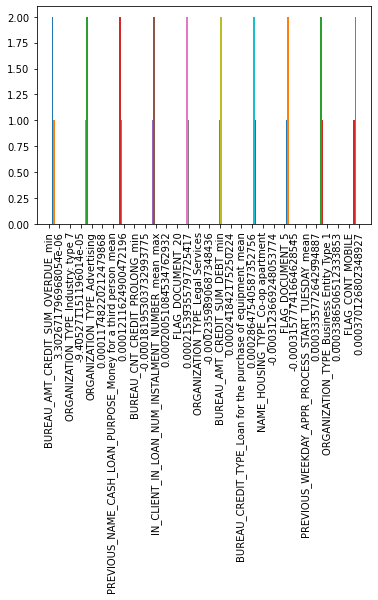

In [41]:
corrs=[]
for col in app.columns:
    # Calculate correlation with the target
    cor = app['TARGET'].corr(app[col])
    
    # Append the list as a tuple
    corrs.append((col, cor))
corrs = sorted(corrs, key = lambda x: abs(x[1]))
plt.hist(corrs[:15])
plt.xticks(rotation=90);

In [0]:
#Dropping columns with negligible correlation with the target
app=app.drop(columns=["BUREAU_AMT_CREDIT_SUM_OVERDUE_min","ORGANIZATION_TYPE_Industry: type 7"])

In [43]:
app.shape #check shape of final merged dataframe

(307511, 1330)

## Checking for multi-collinearity

In [0]:
#Create sample application dataframe to generate correlation matrix
app_sample=app.sample(frac=0.4)

In [0]:
#Generating correlation matrix
corr_matrix = app_sample.corr()

In [46]:
#List of columns with high multi-collinearity
correlation_threshold=0.99
top = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
high_corr_cols = [col for col in top.columns if any(top[col].abs() > correlation_threshold)]
len(high_corr_cols)

360

In [0]:
#Dropping highly multi-collinear columns
app=app.drop(columns=high_corr_cols)

In [0]:
#Saving final dataset
app.to_csv("appDF_final3.csv")

In [0]:
!cp appDF_final3.csv drive/My\ Drive

In [0]:
#Loading final dataset
app=pd.read_csv('drive/My Drive/appDF_final3.csv')

In [48]:
app.shape     #view updated shape

(307511, 970)